In [2]:
import os 
import shutil
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [3]:
%%time
df = pd.read_csv("C:/Users/bobbr/OneDrive/Documents/The Plan/NFL/2023/Modelling/te_player_data_final.csv")

#df = pd.read_csv("all_tes_gamelogs_feature_eng_pt7.csv")
df = df.fillna(0)
df['FantasyPoints'] = (-df['Fumbles FL']*1 + df['Rushing Yds']*0.1 + df['Rushing TD']*6+df['Scoring 2PM']*2
                      + df['Receiving Rec']*0.5 + df['Receiving Yds']*0.1 + df['Receiving TD']*6) 
df = df[df['FantasyPoints']>0]
df = df[df['Year']>2015]
df = df[df['FantasyPoints']< 30]

CPU times: total: 9.59 s
Wall time: 12.9 s


In [4]:
df.shape

(6102, 4936)

<Axes: xlabel='FantasyPoints', ylabel='Density'>

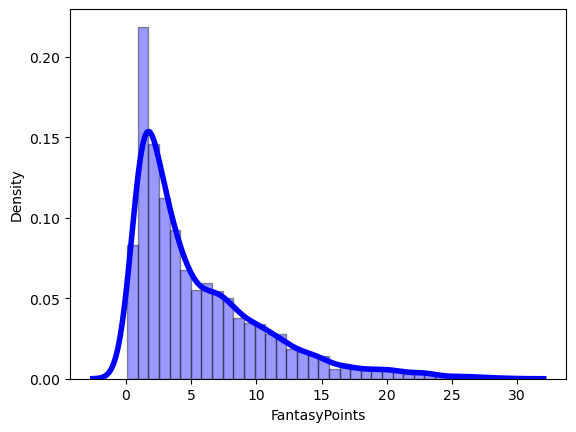

In [5]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
#plt.hist(df['FantasyPoints'], color = 'blue', edgecolor = 'black',
#         bins = int(180/5))

# seaborn histogram
sns.distplot(df['FantasyPoints'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},
            kde_kws = {'linewidth':4})
# Add labels
##plt.title('Histogram of Fantasy Points')
#plt.xlabel('FantasyPoints')
#plt.ylabel('Count')

In [6]:

df = df.drop(columns = ['Unnamed: 0',# 'Unnamed: 0.1',
#'player_wk_year',
'Player ',
'Fumbles FF','Fumbles FL','Fumbles FR','Fumbles Fmb',
'Fumbles TD','Fumbles Yds','Kick Returns Rt','Kick Returns TD',
'Kick Returns Y/Rt','Kick Returns Yds','Off. Snaps Num','Off. Snaps Pct',
'Punt Returns Ret','Punt Returns TD','Punt Returns Y/R','Punt Returns Yds',
'Receiving Ctch%','Receiving Rec','Receiving TD','Receiving Tgt',
'Receiving Y/R','Receiving Y/Tgt','Receiving Yds','Rushing Att',
'Rushing TD','Rushing Y/A','Rushing Yds','ST Snaps Num',
'ST Snaps Pct','Scoring 2PM','Scoring Pts',#'Scoring Sfty',
'Scoring TD',
'Rk',
'GS',
#'Year',
#'Status',
'Date',
'G#',
'Age',
'Tm',
'home_away',
'Result',
'Player  1 wks ago',

#'Status 1 wks ago',
'Date 1 wks ago',
'Week 1 wks ago',
'Tm 1 wks ago',
'home_away 1 wks ago',
'Opp 1 wks ago',
'Result 1 wks ago',
'player_wk_year 1 wks ago',
'Player  2 wks ago',
#'Status 2 wks ago',
'Date 2 wks ago',
'Week 2 wks ago',
#'Age 2 wks ago',
'Tm 2 wks ago',
'home_away 2 wks ago',
'Opp 2 wks ago',
'Result 2 wks ago',
'player_wk_year 2 wks ago',
'Player  3 wks ago',

#'Status 3 wks ago',
'Date 3 wks ago',
'Week 3 wks ago',
#'Age 3 wks ago',
'Tm 3 wks ago',
'home_away 3 wks ago',
'Opp 3 wks ago',
'Result 3 wks ago',
'player_wk_year 3 wks ago',
'Player  4 wks ago',
#'Status 4 wks ago',
'Date 4 wks ago',
'Week 4 wks ago',
#'Age 4 wks ago',
'Tm 4 wks ago',
'home_away 4 wks ago',
'Opp 4 wks ago',
'Result 4 wks ago',
'player_wk_year 4 wks ago',
'Player  5 wks ago',

#'Status 5 wks ago',
'Date 5 wks ago',
'Week 5 wks ago',
#'Age 5 wks ago',
'Tm 5 wks ago',
'home_away 5 wks ago',
'Opp 5 wks ago',
'Result 5 wks ago',
'player_wk_year 5 wks ago',
'Player  6 wks ago',
#'Status 6 wks ago',
'Date 6 wks ago',
'Week 6 wks ago',
#'Age 6 wks ago',
'Tm 6 wks ago',
'home_away 6 wks ago',
'Opp 6 wks ago',
'Result 6 wks ago',
'player_wk_year 6 wks ago',
'Player  7 wks ago',

#'Status 7 wks ago',
'Date 7 wks ago',
'Week 7 wks ago',
#'Age 7 wks ago',
'Tm 7 wks ago',
'home_away 7 wks ago',
'Opp 7 wks ago',
'Result 7 wks ago',
'player_wk_year 7 wks ago',
'Player  8 wks ago',

#'Status 8 wks ago',
'Date 8 wks ago',
'Week 8 wks ago',
#'Age 8 wks ago',
'Tm 8 wks ago',
'home_away 8 wks ago',
'Opp 8 wks ago',
'Result 8 wks ago',
'player_wk_year 8 wks ago',
'Player  9 wks ago',

#'Status 9 wks ago',
'Date 9 wks ago',
'Week 9 wks ago',
#'Age 9 wks ago',
'Tm 9 wks ago',
'home_away 9 wks ago',
'Opp 9 wks ago',
'Result 9 wks ago',
'player_wk_year 9 wks ago',
'Player  10 wks ago',

#'Status 10 wks ago',
'Date 10 wks ago',
'Week 10 wks ago',
#'Age 10 wks ago',
'Tm 10 wks ago',
'home_away 10 wks ago',
'Opp 10 wks ago',
'Result 10 wks ago',
'player_wk_year 10 wks ago',
'Player  11 wks ago',

#'Status 11 wks ago',
'Date 11 wks ago',
'Week 11 wks ago',
#'Age 11 wks ago',
'Tm 11 wks ago',
'home_away 11 wks ago',
'Opp 11 wks ago',
'Result 11 wks ago',
'player_wk_year 11 wks ago',
'Player  12 wks ago',

#'Status 12 wks ago',
'Date 12 wks ago',
'Week 12 wks ago',
#'Age 12 wks ago',
'Tm 12 wks ago',
'home_away 12 wks ago',
'Opp 12 wks ago',
'Result 12 wks ago',
'player_wk_year 12 wks ago',
'Player  13 wks ago',

#'Status 13 wks ago',
'Date 13 wks ago',
'Week 13 wks ago',
#'Age 13 wks ago',
'Tm 13 wks ago',
'home_away 13 wks ago',
'Opp 13 wks ago',
'Result 13 wks ago',
'player_wk_year 13 wks ago',
'Player  14 wks ago',

#'Status 14 wks ago',
'Date 14 wks ago',
'Week 14 wks ago',
#'Age 14 wks ago',
'Tm 14 wks ago',
'home_away 14 wks ago',
'Opp 14 wks ago',
'Result 14 wks ago',
'player_wk_year 14 wks ago',
'Player  15 wks ago',

#'Status 15 wks ago',
'Date 15 wks ago',
'Week 15 wks ago',
#'Age 15 wks ago',
'Tm 15 wks ago',
'home_away 15 wks ago',
'Opp 15 wks ago',
'Result 15 wks ago',
'player_wk_year 15 wks ago',
'Player  16 wks ago',
#'Status 16 wks ago',
'Date 16 wks ago',
'Week 16 wks ago',
#'Age 16 wks ago',
'Tm 16 wks ago',
'home_away 16 wks ago',
'Opp 16 wks ago',
'Result 16 wks ago',
'player_wk_year 16 wks ago',
'Player  17 wks ago',

#'Status 17 wks ago',
'Date 17 wks ago',
'Week 17 wks ago',
#'Age 17 wks ago',
'Tm 17 wks ago',
'home_away 17 wks ago',
'Opp 17 wks ago',
'Result 17 wks ago',
'player_wk_year 17 wks ago',
'Player  18 wks ago',
#'Status 18 wks ago',
'Date 18 wks ago',
'Week 18 wks ago',
#'Age 18 wks ago',
'Tm 18 wks ago',
'home_away 18 wks ago',
'Opp 18 wks ago',
'Result 18 wks ago',
'player_wk_year 18 wks ago',
'Player  19 wks ago',
#'Status 19 wks ago',
'Date 19 wks ago',
'Week 19 wks ago',
#'Age 19 wks ago',
'Tm 19 wks ago',
'home_away 19 wks ago',
'Opp 19 wks ago',
'Result 19 wks ago',
'player_wk_year 19 wks ago',
'Player  20 wks ago',
#'Status 20 wks ago',
'Date 20 wks ago',
'Week 20 wks ago',
#'Age 20 wks ago',
'Tm 20 wks ago',
'home_away 20 wks ago',
'Opp 20 wks ago',
'Result 20 wks ago',
'player_wk_year 20 wks ago',
'Player  21 wks ago',

#'Status 21 wks ago',
'Date 21 wks ago',
'Week 21 wks ago',
#'Age 21 wks ago',
'Tm 21 wks ago',
'home_away 21 wks ago',
'Opp 21 wks ago',
'Result 21 wks ago',
'player_wk_year 21 wks ago',
'Player  22 wks ago',

#'Status 22 wks ago',
'Date 22 wks ago',
'Week 22 wks ago',
#'Age 22 wks ago',
'Tm 22 wks ago',
'home_away 22 wks ago',
'Opp 22 wks ago',
'Result 22 wks ago',
'player_wk_year 22 wks ago',
'Player  23 wks ago',

#'Status 23 wks ago',
'Date 23 wks ago',
'Week 23 wks ago',
#'Age 23 wks ago',
'Tm 23 wks ago',
'home_away 23 wks ago',
'Opp 23 wks ago',
'Result 23 wks ago',
'player_wk_year 23 wks ago',
'Player  24 wks ago',

#'Status 24 wks ago',
'Date 24 wks ago',
'Week 24 wks ago',
#'Age 24 wks ago',
'Tm 24 wks ago',
'home_away 24 wks ago',
'Opp 24 wks ago',
'Result 24 wks ago',
'player_wk_year 24 wks ago',
'Player  25 wks ago',

#'Status 25 wks ago',
'Date 25 wks ago',
'Week 25 wks ago',
#'Age 25 wks ago',
'Tm 25 wks ago',
'home_away 25 wks ago',
'Opp 25 wks ago',
'Result 25 wks ago',
'player_wk_year 25 wks ago',
'Player  26 wks ago',
#'Status 26 wks ago',
'Date 26 wks ago',
'Week 26 wks ago',
#'Age 26 wks ago',
'Tm 26 wks ago',
'home_away 26 wks ago',
'Opp 26 wks ago',
'Result 26 wks ago',
'player_wk_year 26 wks ago',
'Player  27 wks ago',
#'Status 27 wks ago',
'Date 27 wks ago',
'Week 27 wks ago',
#'Age 27 wks ago',
'Tm 27 wks ago',
'home_away 27 wks ago',
'Opp 27 wks ago',
'Result 27 wks ago',
'player_wk_year 27 wks ago',
'Player  28 wks ago',
#'Status 28 wks ago',
'Date 28 wks ago',
'Week 28 wks ago',
#'Age 28 wks ago',
'Tm 28 wks ago',
'home_away 28 wks ago',
'Opp 28 wks ago',
'Result 28 wks ago',
'player_wk_year 28 wks ago',
'Player  29 wks ago',
#'Status 29 wks ago',
'Date 29 wks ago',
'Week 29 wks ago',
#'Age 29 wks ago',
'Tm 29 wks ago',
'home_away 29 wks ago',
'Opp 29 wks ago',
'Result 29 wks ago',
'player_wk_year 29 wks ago',
'Player  30 wks ago',
#'Status 30 wks ago',
'Date 30 wks ago',
'Week 30 wks ago',
#'Age 30 wks ago',
'Tm 30 wks ago',
'home_away 30 wks ago',
'Opp 30 wks ago',
'Result 30 wks ago',
'player_wk_year 30 wks ago',
'Player  31 wks ago',
#'Status 31 wks ago',
'Date 31 wks ago',
'Week 31 wks ago',
#'Age 31 wks ago',
'Tm 31 wks ago',
'home_away 31 wks ago',
'Opp 31 wks ago',
'Result 31 wks ago',
'player_wk_year 31 wks ago',
'Player  32 wks ago',
#'Status 32 wks ago',
'Date 32 wks ago',
'Week 32 wks ago',
#'Age 32 wks ago',
'Tm 32 wks ago',
'home_away 32 wks ago',
'Opp 32 wks ago',
'Result 32 wks ago',
'player_wk_year 32 wks ago',
'Player  33 wks ago',
#'Status 33 wks ago',
'Date 33 wks ago',
'Week 33 wks ago',
#'Age 33 wks ago',
'Tm 33 wks ago',
'home_away 33 wks ago',
'Opp 33 wks ago',
'Result 33 wks ago',
'player_wk_year 33 wks ago',
'Player  34 wks ago',
#'Status 34 wks ago',
'Date 34 wks ago',
'Week 34 wks ago',
#'Age 34 wks ago',
'Tm 34 wks ago',
'home_away 34 wks ago',
'Opp 34 wks ago',
'Result 34 wks ago',
'player_wk_year 34 wks ago',
'Player  35 wks ago',
#'Status 35 wks ago',
'Date 35 wks ago',
'Week 35 wks ago',
#'Age 35 wks ago',
'Tm 35 wks ago',
'home_away 35 wks ago',
'Opp 35 wks ago',
'Result 35 wks ago',
'player_wk_year 35 wks ago',
'opp wk year',
'Team',
'CITY',
'Week',
'Sack',
'FR',
'INT',
'DefTD',
'PA',
'PaYD',
'RuYd',
'Safety',
'KickTD',
'FPts',
'week_num',
'year',
'Opp',
'away flag',
'opp Team 1wks ago',
'opp CITY 1wks ago',
'opp Team 2wks ago',
'opp CITY 2wks ago',
'opp Team 3wks ago',
'opp CITY 3wks ago',
'opp Team 4wks ago',
'opp CITY 4wks ago',
'opp Team 5wks ago',
'opp CITY 5wks ago',
'opp Team 6wks ago',
'opp CITY 6wks ago',
'opp Team 7wks ago',
'opp CITY 7wks ago',
'opp Team 8wks ago',
'opp CITY 8wks ago',
'opp Team 9wks ago',
'opp CITY 9wks ago',
'opp Team 10wks ago',
'opp CITY 10wks ago',
'opp Team 11wks ago',
'opp CITY 11wks ago',
'opp Team 12wks ago',
'opp CITY 12wks ago',
'opp Team 13wks ago',
'opp CITY 13wks ago',
'opp Team 14wks ago',
'opp CITY 14wks ago',
'opp Team 15wks ago',
'opp CITY 15wks ago',
'opp Team 16wks ago',
'opp CITY 16wks ago',
'opp Team 17wks ago',
'opp CITY 17wks ago',
'opp Team 18wks ago',
'opp CITY 18wks ago',
'opp Team 19wks ago',
'opp CITY 19wks ago',
'opp Team 20wks ago',
'opp CITY 20wks ago',
'opp Team 21wks ago',
'opp CITY 21wks ago',
'opp Team 22wks ago',
'opp CITY 22wks ago',
'opp Team 23wks ago',
'opp CITY 23wks ago',
'opp Team 24wks ago',
'opp CITY 24wks ago',
'opp Team 25wks ago',
'opp CITY 25wks ago',
'opp Team 26wks ago',
'opp CITY 26wks ago',
'opp Team 27wks ago',
'opp CITY 27wks ago',
'opp Team 28wks ago',
'opp CITY 28wks ago',
'opp Team 29wks ago',
'opp CITY 29wks ago',
'opp Team 30wks ago',
'opp CITY 30wks ago',
'opp Team 31wks ago',
'opp CITY 31wks ago',
'opp Team 32wks ago',
'opp CITY 32wks ago',
'opp Team 33wks ago',
'opp CITY 33wks ago',
'opp Team 34wks ago',
'opp CITY 34wks ago',
'opp Team 35wks ago',
'opp CITY 35wks ago',
'team_wk_year',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup Opp 2wks ago',
#'def matchup away flag 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup Opp 3wks ago',
#'def matchup away flag 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup Opp 4wks ago',
#'def matchup away flag 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup Opp 5wks ago',
#'def matchup away flag 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup Opp 6wks ago',
#'def matchup away flag 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup Opp 7wks ago',
#'def matchup away flag 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup Opp 8wks ago',
#'def matchup away flag 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup Opp 9wks ago',
#'def matchup away flag 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup Opp 10wks ago',
#'def matchup away flag 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup Opp 11wks ago',
#'def matchup away flag 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup Opp 12wks ago',
#'def matchup away flag 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup Opp 13wks ago',
#'def matchup away flag 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup Opp 14wks ago',
#'def matchup away flag 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup Opp 15wks ago',
#'def matchup away flag 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup Opp 16wks ago',
#'def matchup away flag 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup Opp 17wks ago',
#'def matchup away flag 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup Opp 18wks ago',
#'def matchup away flag 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup Opp 19wks ago',
#'def matchup away flag 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup Opp 20wks ago',
#'def matchup away flag 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup Opp 21wks ago',
#'def matchup away flag 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup Opp 22wks ago',
#'def matchup away flag 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup Opp 23wks ago',
#'def matchup away flag 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup Opp 24wks ago',
#'def matchup away flag 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup Opp 25wks ago',
#'def matchup away flag 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup Opp 26wks ago',
#'def matchup away flag 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup Opp 27wks ago',
#'def matchup away flag 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup Opp 28wks ago',
#'def matchup away flag 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup Opp 29wks ago',
#'def matchup away flag 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup Opp 30wks ago',
#'def matchup away flag 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup Opp 31wks ago',
#'def matchup away flag 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup Opp 32wks ago',
#'def matchup away flag 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup Opp 33wks ago',
#'def matchup away flag 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup Opp 34wks ago',
#'def matchup away flag 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup Opp 35wks ago',
#'def matchup away flag 35wks ago',
'def matchup team_wk_year 35wks ago',
                       'opp_wk_year',
                        'opp opp_wk_year 1wks ago', 
                        'opp opp_wk_year 2wks ago', 
                        'opp opp_wk_year 3wks ago', 
                        'opp opp_wk_year 4wks ago', 
                        'opp opp_wk_year 5wks ago', 
                        'opp opp_wk_year 6wks ago',
                        'opp opp_wk_year 7wks ago', 
                        'opp opp_wk_year 8wks ago', 
                        'opp opp_wk_year 9wks ago',
                        'opp opp_wk_year 10wks ago',
                        'opp opp_wk_year 11wks ago',
                        'opp opp_wk_year 12wks ago',
                        'opp opp_wk_year 13wks ago',
                        'opp opp_wk_year 14wks ago',
                        'opp opp_wk_year 15wks ago',
                        'opp opp_wk_year 16wks ago',
                        'opp opp_wk_year 17wks ago', 
                        'opp opp_wk_year 18wks ago',
                        'opp opp_wk_year 19wks ago',
                        'opp opp_wk_year 20wks ago',
                        'opp opp_wk_year 21wks ago',
                        'opp opp_wk_year 22wks ago',
                        'opp opp_wk_year 23wks ago', 
                        'opp opp_wk_year 24wks ago', 
                        'opp opp_wk_year 25wks ago', 
                        'opp opp_wk_year 26wks ago', 
                        'opp opp_wk_year 27wks ago', 
                        'opp opp_wk_year 28wks ago', 
                        'opp opp_wk_year 29wks ago',
                        'opp opp_wk_year 30wks ago',
                        'opp opp_wk_year 31wks ago',
                        'opp opp_wk_year 32wks ago',
                        'opp opp_wk_year 33wks ago',
                        'opp opp_wk_year 34wks ago',
                        'opp opp_wk_year 35wks ago', 
                        'def matchup opp_wk_year 1wks ago',
                        'def matchup opp_wk_year 2wks ago',
                        'def matchup opp_wk_year 3wks ago',
                        'def matchup opp_wk_year 4wks ago', 
                       'def matchup opp_wk_year 5wks ago',
                        'def matchup opp_wk_year 6wks ago',
                        'def matchup opp_wk_year 7wks ago',
                        'def matchup opp_wk_year 8wks ago',
                        'def matchup opp_wk_year 9wks ago', 
                        'def matchup opp_wk_year 10wks ago',
                        'def matchup opp_wk_year 11wks ago',
                        'def matchup opp_wk_year 12wks ago', 
                        'def matchup opp_wk_year 13wks ago', 
                        'def matchup opp_wk_year 14wks ago',
                        'def matchup opp_wk_year 15wks ago', 
                       'def matchup opp_wk_year 16wks ago', 
                        'def matchup opp_wk_year 17wks ago', 
                        'def matchup opp_wk_year 18wks ago', 
                        'def matchup opp_wk_year 19wks ago', 
                        'def matchup opp_wk_year 20wks ago', 
                        'def matchup opp_wk_year 21wks ago',
                        'def matchup opp_wk_year 22wks ago',
                        'def matchup opp_wk_year 23wks ago',
                        'def matchup opp_wk_year 24wks ago', 
                        'def matchup opp_wk_year 25wks ago', 
                        'def matchup opp_wk_year 26wks ago', 
                        'def matchup opp_wk_year 27wks ago',
                        'def matchup opp_wk_year 28wks ago',
                        'def matchup opp_wk_year 29wks ago',
                        'def matchup opp_wk_year 30wks ago', 
                       'def matchup opp_wk_year 31wks ago', 
                        'def matchup opp_wk_year 32wks ago', 
                        'def matchup opp_wk_year 33wks ago', 
                        'def matchup opp_wk_year 34wks ago', 
                        'def matchup opp_wk_year 35wks ago'
                       
          ]

)

In [7]:
df['sum Off. Snaps Pct 2wk trend'] = df['sum Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 2wk trend'] = df['avg Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 2wk trend'] = df['min Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 2wk trend'] = df['max Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 3wk trend'] = df['sum Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 3wk trend'] = df['avg Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 3wk trend'] = df['min Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 3wk trend'] = df['max Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 4wk trend'] = df['sum Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 4wk trend'] = df['avg Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 4wk trend'] = df['min Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 4wk trend'] = df['max Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 5wk trend'] = df['sum Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 5wk trend'] = df['avg Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 5wk trend'] = df['min Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 5wk trend'] = df['max Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 6wk trend'] = df['sum Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 6wk trend'] = df['avg Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 6wk trend'] = df['min Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 6wk trend'] = df['max Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 9wk trend'] = df['sum Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 9wk trend'] = df['avg Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 9wk trend'] = df['min Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 9wk trend'] = df['max Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 12wk trend'] = df['sum Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 12wk trend'] = df['avg Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 12wk trend'] = df['min Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 12wk trend'] = df['max Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 15wk trend'] = df['sum Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 15wk trend'] = df['avg Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 15wk trend'] = df['min Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 15wk trend'] = df['max Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 18wk trend'] = df['sum Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 18wk trend'] = df['avg Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 18wk trend'] = df['min Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 18wk trend'] = df['max Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 24wk trend'] = df['sum Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 24wk trend'] = df['avg Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 24wk trend'] = df['min Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 24wk trend'] = df['max Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 30wk trend'] = df['sum Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 30wk trend'] = df['avg Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 30wk trend'] = df['min Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 30wk trend'] = df['max Off. Snaps Pct 30wk trend'].astype('float') / 100.0

#df['sum Passing Cmp% 2wk trend'] = df['sum Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 2wk trend'] = df['avg Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 2wk trend'] = df['min Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 2wk trend'] = df['max Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 3wk trend'] = df['sum Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 3wk trend'] = df['avg Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 3wk trend'] = df['min Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 3wk trend'] = df['max Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 4wk trend'] = df['sum Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 4wk trend'] = df['avg Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 4wk trend'] = df['min Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 4wk trend'] = df['max Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 5wk trend'] = df['sum Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 5wk trend'] = df['avg Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 5wk trend'] = df['min Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 5wk trend'] = df['max Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 6wk trend'] = df['sum Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 6wk trend'] = df['avg Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 6wk trend'] = df['min Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 6wk trend'] = df['max Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 9wk trend'] = df['sum Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 9wk trend'] = df['avg Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 9wk trend'] = df['min Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 9wk trend'] = df['max Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 12wk trend'] = df['sum Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 12wk trend'] = df['avg Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 12wk trend'] = df['min Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 12wk trend'] = df['max Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 15wk trend'] = df['sum Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 15wk trend'] = df['avg Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 15wk trend'] = df['min Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 15wk trend'] = df['max Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 18wk trend'] = df['sum Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 18wk trend'] = df['avg Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 18wk trend'] = df['min Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 18wk trend'] = df['max Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 24wk trend'] = df['sum Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 24wk trend'] = df['avg Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 24wk trend'] = df['min Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 24wk trend'] = df['max Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 30wk trend'] = df['sum Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 30wk trend'] = df['avg Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 30wk trend'] = df['min Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 30wk trend'] = df['max Passing Cmp% 30wk trend'].astype('float') / 100.0


df['sum ST Snaps Pct 2wk trend'] = df['sum ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 2wk trend'] = df['avg ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 2wk trend'] = df['min ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 2wk trend'] = df['max ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 3wk trend'] = df['sum ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 3wk trend'] = df['avg ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 3wk trend'] = df['min ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 3wk trend'] = df['max ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 4wk trend'] = df['sum ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 4wk trend'] = df['avg ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 4wk trend'] = df['min ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 4wk trend'] = df['max ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 5wk trend'] = df['sum ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 5wk trend'] = df['avg ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 5wk trend'] = df['min ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 5wk trend'] = df['max ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 6wk trend'] = df['sum ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 6wk trend'] = df['avg ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 6wk trend'] = df['min ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 6wk trend'] = df['max ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 9wk trend'] = df['sum ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 9wk trend'] = df['avg ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 9wk trend'] = df['min ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 9wk trend'] = df['max ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 12wk trend'] = df['sum ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 12wk trend'] = df['avg ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 12wk trend'] = df['min ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 12wk trend'] = df['max ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 15wk trend'] = df['sum ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 15wk trend'] = df['avg ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 15wk trend'] = df['min ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 15wk trend'] = df['max ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 18wk trend'] = df['sum ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 18wk trend'] = df['avg ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 18wk trend'] = df['min ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 18wk trend'] = df['max ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 24wk trend'] = df['sum ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 24wk trend'] = df['avg ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 24wk trend'] = df['min ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 24wk trend'] = df['max ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 30wk trend'] = df['sum ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 30wk trend'] = df['avg ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 30wk trend'] = df['min ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 30wk trend'] = df['max ST Snaps Pct 30wk trend'].astype('float') / 100.0

In [8]:
#Off. Snaps Pct 35 wks ago, Receiving Ctch% 35 wks ago, ST Snaps Pct 35 wks ago
df['Receiving Ctch% 35 wks ago'] = df['Receiving Ctch% 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df['ST Snaps Pct 35 wks ago'] = df['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df['Off. Snaps Pct 35 wks ago'] = df['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [10]:
df = shuffle(df, random_state = 0)
#df_oob = df[df['Year'] == 2021]
#df = df[df['Year'] != 2021]
df = df.drop(columns = ['Year'])
#df_oob = df_oob.drop(columns = ['Year'])
#df =df[~df['player_wk_year'].str.contains('3 2022')]

#print(df_oob.shape, df.shape)

In [11]:
# Importing the libraries
#import pyspark.sql.functions as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import joblib
import shutil
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 300)

from sklearn.model_selection import GridSearchCV
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
import sklearn.metrics as sklmetrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn import metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import optuna

In [12]:
# split data into X and y
X = df.drop(columns = ['FantasyPoints'])
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [13]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [14]:
X_train_id = X_train[['player_wk_year']]
X_train = X_train.drop(columns = 'player_wk_year')
X_train = X_train.fillna(0)
#X_train = scaler.fit_transform(X_train)

y_train = y_train.fillna(0)
#y_train  = scaler.fit_transform(y_train)

y_test = y_test.fillna(0)
#y_test = scaler.fit_transform(y_test)

X_test_id = X_test[['player_wk_year']]
X_test = X_test.drop(columns = 'player_wk_year')
X_test = X_test.fillna(0)
#X_test = scaler.fit_transform(X_test)

#X_oob = df_oob.drop(columns = ['FantasyPoints','player_wk_year'])
#X_oob = X_oob.fillna(0)
#X_oob = scaler.fit_transform(X_oob)

#y_oob = df_oob[['FantasyPoints']]
#y_oob = y_oob.fillna(0)
#y_oob = y_oob.rename(columns = {'FantasyPoints':'y'})


#oob_id = df_oob[['FantasyPoints','player_wk_year']]


In [15]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[17:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  5.662018


In [16]:
if X.shape[0] != Y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [17]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

[I 2023-09-16 17:18:11,725] A new study created in memory with name: no-name-edde2615-71c5-4551-882a-b29552b90e5f
[I 2023-09-16 17:18:13,773] Trial 0 finished with value: 7.212780241165553 and parameters: {'booster': 'gbtree', 'lambda': 0.305652330367633, 'alpha': 2.1162367088779596e-05, 'subsample': 0.25061624897410284, 'colsample_bytree': 0.9410240413077584, 'max_depth': 5, 'min_child_weight': 7, 'eta': 2.4177513530591206e-07, 'gamma': 0.14271380208063217, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 7.212780241165553.


RMSE :  7.212780


[I 2023-09-16 17:18:16,184] Trial 1 finished with value: 7.212669363790929 and parameters: {'booster': 'dart', 'lambda': 0.040180782641023274, 'alpha': 2.874896653572788e-06, 'subsample': 0.7422799458495224, 'colsample_bytree': 0.2710903865399652, 'max_depth': 3, 'min_child_weight': 7, 'eta': 2.8366710703125837e-06, 'gamma': 6.033823009634367e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.001068013005970981, 'skip_drop': 1.505338310131385e-05}. Best is trial 1 with value: 7.212669363790929.


RMSE :  7.212669


[I 2023-09-16 17:18:17,799] Trial 2 finished with value: 5.0740825305982025 and parameters: {'booster': 'gblinear', 'lambda': 0.00010761305348557003, 'alpha': 1.2654831549502707e-06, 'subsample': 0.6423016152848793, 'colsample_bytree': 0.5391764342783306}. Best is trial 2 with value: 5.0740825305982025.


RMSE :  5.074083


[I 2023-09-16 17:18:19,334] Trial 3 finished with value: 4.999714747351374 and parameters: {'booster': 'gblinear', 'lambda': 4.1487505093476055e-05, 'alpha': 2.1409858812543154e-08, 'subsample': 0.24036263719805007, 'colsample_bytree': 0.9362122869652003}. Best is trial 3 with value: 4.999714747351374.


RMSE :  4.999715


[I 2023-09-16 17:18:22,533] Trial 4 finished with value: 7.144197170476472 and parameters: {'booster': 'dart', 'lambda': 1.2223143411287587e-07, 'alpha': 2.2749521867299818e-07, 'subsample': 0.5152427146723622, 'colsample_bytree': 0.5118543105675357, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.0015892537107987691, 'gamma': 2.1537385914165342e-07, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.050012826033245396, 'skip_drop': 1.1868296172470606e-06}. Best is trial 3 with value: 4.999714747351374.


RMSE :  7.144197


[I 2023-09-16 17:18:24,674] Trial 5 finished with value: 7.096861330405901 and parameters: {'booster': 'gbtree', 'lambda': 0.20267136260219304, 'alpha': 5.731454109186935e-06, 'subsample': 0.5736210046425909, 'colsample_bytree': 0.6804833864313486, 'max_depth': 5, 'min_child_weight': 7, 'eta': 0.002742428820806161, 'gamma': 8.622777608907539e-08, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 4.999714747351374.


RMSE :  7.096861


[I 2023-09-16 17:18:26,837] Trial 6 finished with value: 6.353320669319867 and parameters: {'booster': 'gbtree', 'lambda': 4.551103211690043e-05, 'alpha': 9.608687723575318e-05, 'subsample': 0.39239433276016505, 'colsample_bytree': 0.39165719835031254, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.022892952262273874, 'gamma': 0.0009501402887745064, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 4.999714747351374.


RMSE :  6.353321


[I 2023-09-16 17:18:28,918] Trial 7 finished with value: 7.212789374900965 and parameters: {'booster': 'gbtree', 'lambda': 3.8087976834084507e-06, 'alpha': 0.0027646576614344253, 'subsample': 0.2710856528658349, 'colsample_bytree': 0.6406684157614647, 'max_depth': 7, 'min_child_weight': 8, 'eta': 2.633199591603263e-08, 'gamma': 3.019382526653706e-06, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 4.999714747351374.


RMSE :  7.212789


[I 2023-09-16 17:18:30,524] Trial 8 finished with value: 4.892751701326098 and parameters: {'booster': 'gblinear', 'lambda': 0.00047593538100881356, 'alpha': 2.363646682696087e-08, 'subsample': 0.4068871212344625, 'colsample_bytree': 0.6634013810053594}. Best is trial 8 with value: 4.892751701326098.


RMSE :  4.892752


[I 2023-09-16 17:18:32,370] Trial 9 finished with value: 7.2127276229826585 and parameters: {'booster': 'gbtree', 'lambda': 0.0004973647742491526, 'alpha': 4.069167284182258e-08, 'subsample': 0.22868691744434538, 'colsample_bytree': 0.46156727394513086, 'max_depth': 5, 'min_child_weight': 9, 'eta': 1.448235349365688e-06, 'gamma': 0.00015869629659783386, 'grow_policy': 'lossguide'}. Best is trial 8 with value: 4.892751701326098.


RMSE :  7.212728


[I 2023-09-16 17:18:33,947] Trial 10 finished with value: 4.591573029912706 and parameters: {'booster': 'gblinear', 'lambda': 0.004416890598322276, 'alpha': 0.025203288558405874, 'subsample': 0.9992832349065972, 'colsample_bytree': 0.7572616075071961}. Best is trial 10 with value: 4.591573029912706.


RMSE :  4.591573


[I 2023-09-16 17:18:35,323] Trial 11 finished with value: 4.577836219151447 and parameters: {'booster': 'gblinear', 'lambda': 0.00692567151291088, 'alpha': 0.7619753886319242, 'subsample': 0.9809134725239937, 'colsample_bytree': 0.7656664578354159}. Best is trial 11 with value: 4.577836219151447.


RMSE :  4.577836


[I 2023-09-16 17:18:36,765] Trial 12 finished with value: 4.5614641733425945 and parameters: {'booster': 'gblinear', 'lambda': 0.01099265764846669, 'alpha': 0.261673367072258, 'subsample': 0.9706872718592928, 'colsample_bytree': 0.7888662758458059}. Best is trial 12 with value: 4.5614641733425945.


RMSE :  4.561464


[I 2023-09-16 17:18:38,242] Trial 13 finished with value: 4.58240803732131 and parameters: {'booster': 'gblinear', 'lambda': 0.01106662031694284, 'alpha': 0.8617428591374527, 'subsample': 0.9574358761997158, 'colsample_bytree': 0.8003679534496807}. Best is trial 12 with value: 4.5614641733425945.


RMSE :  4.582408


[I 2023-09-16 17:18:39,731] Trial 14 finished with value: 4.585008200205296 and parameters: {'booster': 'gblinear', 'lambda': 0.9553237809319435, 'alpha': 0.5738191062068704, 'subsample': 0.8733755147726063, 'colsample_bytree': 0.8051301220989722}. Best is trial 12 with value: 4.5614641733425945.


RMSE :  4.585008


[I 2023-09-16 17:18:41,191] Trial 15 finished with value: 4.578483484617666 and parameters: {'booster': 'gblinear', 'lambda': 0.005618407605355938, 'alpha': 0.042844703957893214, 'subsample': 0.8549959719706128, 'colsample_bytree': 0.8623430680738687}. Best is trial 12 with value: 4.5614641733425945.


RMSE :  4.578483


[I 2023-09-16 17:18:44,117] Trial 16 finished with value: 5.094127317581129 and parameters: {'booster': 'dart', 'lambda': 0.04582668309923738, 'alpha': 0.00073942062615781, 'subsample': 0.7929736198738475, 'colsample_bytree': 0.9897877229604854, 'max_depth': 3, 'min_child_weight': 10, 'eta': 0.983258414169318, 'gamma': 1.2832481570018741e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.08145253862649e-08, 'skip_drop': 0.07406803146874058}. Best is trial 12 with value: 4.5614641733425945.


RMSE :  5.094127


[I 2023-09-16 17:18:45,683] Trial 17 finished with value: 4.555932470037295 and parameters: {'booster': 'gblinear', 'lambda': 0.001253075812128203, 'alpha': 0.09032265288051505, 'subsample': 0.9367530598593876, 'colsample_bytree': 0.706137277877061}. Best is trial 17 with value: 4.555932470037295.


RMSE :  4.555932


[I 2023-09-16 17:18:47,303] Trial 18 finished with value: 4.628913602988271 and parameters: {'booster': 'gblinear', 'lambda': 0.0011639168882575353, 'alpha': 0.018095677757536132, 'subsample': 0.9182684918632592, 'colsample_bytree': 0.6010534636885315}. Best is trial 17 with value: 4.555932470037295.


RMSE :  4.628914


[I 2023-09-16 17:18:48,828] Trial 19 finished with value: 4.561228293230966 and parameters: {'booster': 'gblinear', 'lambda': 0.08514303041704008, 'alpha': 0.16515965977674202, 'subsample': 0.7954376274980104, 'colsample_bytree': 0.7174284472710037}. Best is trial 17 with value: 4.555932470037295.


RMSE :  4.561228


[I 2023-09-16 17:18:51,776] Trial 20 finished with value: 7.212068638172947 and parameters: {'booster': 'dart', 'lambda': 0.08504790545419612, 'alpha': 0.0012060880850528787, 'subsample': 0.7859780865421766, 'colsample_bytree': 0.6772291587770969, 'max_depth': 7, 'min_child_weight': 2, 'eta': 2.2683380455085143e-05, 'gamma': 0.3054731650361731, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.3118181266757452, 'skip_drop': 1.671173355301613e-08}. Best is trial 17 with value: 4.555932470037295.


RMSE :  7.212069


[I 2023-09-16 17:18:53,335] Trial 21 finished with value: 4.541586066073579 and parameters: {'booster': 'gblinear', 'lambda': 0.02923075634724954, 'alpha': 0.12024524116925192, 'subsample': 0.9003070001152452, 'colsample_bytree': 0.7188516769873751}. Best is trial 21 with value: 4.541586066073579.


RMSE :  4.541586


[I 2023-09-16 17:18:54,878] Trial 22 finished with value: 4.567183437361399 and parameters: {'booster': 'gblinear', 'lambda': 0.980042594744701, 'alpha': 0.12075381945856019, 'subsample': 0.8772886622299916, 'colsample_bytree': 0.7238018012786088}. Best is trial 21 with value: 4.541586066073579.


RMSE :  4.567183


[I 2023-09-16 17:18:56,381] Trial 23 finished with value: 4.557939766071379 and parameters: {'booster': 'gblinear', 'lambda': 0.046366944630323544, 'alpha': 0.07951006287772047, 'subsample': 0.8217837822229173, 'colsample_bytree': 0.5953711223212327}. Best is trial 21 with value: 4.541586066073579.


RMSE :  4.557940


[I 2023-09-16 17:18:57,954] Trial 24 finished with value: 4.654685871735798 and parameters: {'booster': 'gblinear', 'lambda': 0.026061219394015907, 'alpha': 0.007203813656307427, 'subsample': 0.9089313817613546, 'colsample_bytree': 0.5359233471486765}. Best is trial 21 with value: 4.541586066073579.


RMSE :  4.654686


[I 2023-09-16 17:18:59,503] Trial 25 finished with value: 4.561951175675863 and parameters: {'booster': 'gblinear', 'lambda': 0.001956292410593762, 'alpha': 0.05521987512633748, 'subsample': 0.7147392092476813, 'colsample_bytree': 0.5749637027981893}. Best is trial 21 with value: 4.541586066073579.


RMSE :  4.561951


[I 2023-09-16 17:19:01,069] Trial 26 finished with value: 4.6610231204203565 and parameters: {'booster': 'gblinear', 'lambda': 0.01522839645739322, 'alpha': 0.008072659559670663, 'subsample': 0.8478989349963759, 'colsample_bytree': 0.6606075690701851}. Best is trial 21 with value: 4.541586066073579.


RMSE :  4.661023


[I 2023-09-16 17:19:02,598] Trial 27 finished with value: 4.562380079821441 and parameters: {'booster': 'gblinear', 'lambda': 0.2011752963267917, 'alpha': 0.14333147243081112, 'subsample': 0.9212525447735684, 'colsample_bytree': 0.6039991270589294}. Best is trial 21 with value: 4.541586066073579.


RMSE :  4.562380


[I 2023-09-16 17:19:06,678] Trial 28 finished with value: 7.21278989139838 and parameters: {'booster': 'dart', 'lambda': 0.0021578030223318007, 'alpha': 0.0635684262638353, 'subsample': 0.6977560765154862, 'colsample_bytree': 0.8468200436090083, 'max_depth': 9, 'min_child_weight': 5, 'eta': 1.3952465703820889e-08, 'gamma': 0.002554892304205307, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4.792716728787722e-07, 'skip_drop': 0.707305540166411}. Best is trial 21 with value: 4.541586066073579.


RMSE :  7.212790


[I 2023-09-16 17:19:08,444] Trial 29 finished with value: 4.612386232809424 and parameters: {'booster': 'gblinear', 'lambda': 0.20786388971355513, 'alpha': 0.00043677016806465037, 'subsample': 0.8448120270220161, 'colsample_bytree': 0.7191964717009866}. Best is trial 21 with value: 4.541586066073579.


RMSE :  4.612386
Number of finished trials:  30
Best trial:
  Value: 4.541586066073579
  Params: 
    booster: gblinear
    lambda: 0.02923075634724954
    alpha: 0.12024524116925192
    subsample: 0.9003070001152452
    colsample_bytree: 0.7188516769873751
[0]	validation_0-rmse:4.48745	validation_1-rmse:4.58810
[1]	validation_0-rmse:4.41861	validation_1-rmse:4.55831
[2]	validation_0-rmse:4.38059	validation_1-rmse:4.55261
[3]	validation_0-rmse:4.35103	validation_1-rmse:4.54493
[4]	validation_0-rmse:4.33526	validation_1-rmse:4.54671
[5]	validation_0-rmse:4.32155	validation_1-rmse:4.54765
[6]	validation_0-rmse:4.31210	validation_1-rmse:4.55226
[7]	validation_0-rmse:4.30373	validation_1-rmse:4.55640
[8]	validation_0-rmse:4.29683	validation_1-rmse:4.56033
[9]	validation_0-rmse:4.29087	validation_1-rmse:4.56312
[10]	validation_0-rmse:4.28594	validation_1-rmse:4.56770
[11]	validation_0-rmse:4.28167	validation_1-rmse:4.57082
[12]	validation_0-rmse:4.27735	validation_1-rmse:4.57354
[13]	valida

XGBRegressor(alpha=0.12024524116925192, base_score=None, booster='gblinear',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.02923075634724954,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, ...)

In [18]:

imp_dict = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain = pd.DataFrame(imp_dict.items(), columns=['variable', 'weight'])
imp_total_gain = imp_total_gain.sort_values(by = 'weight',ascending=False)
  

In [19]:
imp_total_gain.head()

,variable,weight
3429,sum Receiving Yds 6wk trend,0.214736
2921,sum Off. Snaps Num 24wk trend,0.180426
3425,sum Receiving Yds 5wk trend,0.144082
3433,sum Receiving Yds 9wk trend,0.133629
1171,Fumbles Yds 35 wks ago,0.123249


In [20]:

z = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test=pd.DataFrame(z)
test = test.sort_values(by="feature_importances",ascending = False)


In [21]:
test.head(20)

,features,feature_importances
3429,sum Receiving Yds 6wk trend,0.210245
2921,sum Off. Snaps Num 24wk trend,0.176652
3425,sum Receiving Yds 5wk trend,0.141068
3433,sum Receiving Yds 9wk trend,0.130834
1171,Fumbles Yds 35 wks ago,0.120671
3437,sum Receiving Yds 12wk trend,0.118978
4016,max def matchup INT 15wk trend,0.112372
3441,sum Receiving Yds 15wk trend,0.086904
3445,sum Receiving Yds 18wk trend,0.085369
3421,sum Receiving Yds 4wk trend,0.076721


In [22]:

feat_imp = pd.merge(imp_total_gain, test,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp = feat_imp.head(100)
  

In [23]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


In [24]:
train[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,player_wk_year
5725,22.6,15.158051,Travis Kelce 1 2021
5714,20.8,14.663884,Travis Kelce 5 2020
10109,9.0,14.537089,Darren Waller 2 2021
5722,23.6,14.505177,Travis Kelce 14 2020
5717,20.9,14.441423,Travis Kelce 8 2020
371,18.9,14.432450,Mark Andrews 5 2022
10107,23.2,14.276947,Darren Waller 17 2020
5726,20.4,14.247989,Travis Kelce 2 2021
7331,22.6,14.210295,Greg Olsen 5 2016
5699,7.8,14.200546,Travis Kelce 6 2019


In [25]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [26]:
test[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('test_data_scored_qb.csv')

,y,Prob,player_wk_year
7332,12.4,16.436829,Greg Olsen 6 2016
5721,23.6,15.157684,Travis Kelce 13 2020
5731,10.0,14.874187,Travis Kelce 7 2021
5723,18.8,14.809230,Travis Kelce 15 2020
10110,7.9,14.448663,Darren Waller 3 2021
5693,8.7,14.414719,Travis Kelce 17 2018
7330,18.6,14.387345,Greg Olsen 4 2016
5718,20.9,14.331731,Travis Kelce 9 2020
5728,4.3,14.073664,Travis Kelce 4 2021
5727,13.9,13.915007,Travis Kelce 3 2021


In [27]:
test[['y','Prob','player_wk_year']][test['player_wk_year'].str.contains('1 2023')].sort_values(by='Prob', ascending= False)

,y,Prob,player_wk_year
5919,3.4,9.379250,George Kittle 1 2023
2640,7.4,8.702784,Evan Engram 1 2023
6028,4.0,8.232999,Dawson Knox 1 2023
8327,1.4,6.648909,Dalton Schultz 1 2023
2740,5.1,6.230773,Zach Ertz 1 2023
2333,3.2,5.753319,Greg Dulcich 1 2023
3464,5.1,5.638996,Mike Gesicki 1 2023
5396,12.6,4.943402,Hayden Hurst 1 2023
8800,5.9,4.532505,Durham Smythe 1 2023
3812,4.6,4.161346,Noah Gray 1 2023


In [28]:
train[['y','Prob','player_wk_year']][train['player_wk_year'].str.contains('1 2023')].sort_values(by='Prob', ascending= False)

,y,Prob,player_wk_year
1627,0.7,8.296626,Tyler Conklin 1 2023
4948,7.5,7.787607,T.J. Hockenson 1 2023
10128,5.1,7.307689,Darren Waller 1 2023
4548,14.1,7.230186,Hunter Henry 1 2023
7115,3.4,7.167706,David Njoku 1 2023
7451,2.9,7.081242,Cade Otton 1 2023
4815,6.4,6.929180,Tyler Higbee 1 2023
103,1.7,6.699296,Jordan Akins 1 2023
2851,3.3,6.513396,Gerald Everett 1 2023
7687,5.4,6.471171,Kyle Pitts 1 2023


In [29]:
top_feat_list=feat_imp.variable.to_list()
top_feat_list.append('player_wk_year')

In [30]:
# split data into X and y
X = df.drop(columns = ['FantasyPoints'])
X = X[top_feat_list]
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [31]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [32]:
X_train_id = X_train[['player_wk_year']]
X_train = X_train.drop(columns = 'player_wk_year')
X_train = X_train.fillna(0)
#X_train = scaler.fit_transform(X_train)

y_train = y_train.fillna(0)
#y_train  = scaler.fit_transform(y_train)

y_test = y_test.fillna(0)
#y_test = scaler.fit_transform(y_test)

X_test_id = X_test[['player_wk_year']]
X_test = X_test.drop(columns = 'player_wk_year')
X_test = X_test.fillna(0)
#X_test = scaler.fit_transform(X_test)

#X_oob = df_oob.drop(columns = ['FantasyPoints','player_wk_year'])
#X_oob = X_oob.fillna(0)
#X_oob = scaler.fit_transform(X_oob)

#y_oob = df_oob[['FantasyPoints']]
#y_oob = y_oob.fillna(0)
#y_oob = y_oob.rename(columns = {'FantasyPoints':'y'})


#oob_id = df_oob[['FantasyPoints','player_wk_year']]


In [40]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  4.545752


In [42]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

[I 2023-09-16 17:34:17,765] A new study created in memory with name: no-name-f2513722-9bc9-4bb6-acf1-992d9b29cfa7
[I 2023-09-16 17:34:17,815] Trial 0 finished with value: 4.874935578846294 and parameters: {'booster': 'gblinear', 'lambda': 0.002191307765503687, 'alpha': 3.803837951335458e-08, 'subsample': 0.8706194173988657, 'colsample_bytree': 0.41507088719231877}. Best is trial 0 with value: 4.874935578846294.
[I 2023-09-16 17:34:17,877] Trial 1 finished with value: 367099442.6501267 and parameters: {'booster': 'gblinear', 'lambda': 8.058167086176845e-05, 'alpha': 0.013827550974749993, 'subsample': 0.8069793543124872, 'colsample_bytree': 0.6533825543529918}. Best is trial 0 with value: 4.874935578846294.
[I 2023-09-16 17:34:17,921] Trial 2 finished with value: 7.212786770933508 and parameters: {'booster': 'gbtree', 'lambda': 1.778920000158349e-06, 'alpha': 2.109840840341929e-07, 'subsample': 0.7695552585560217, 'colsample_bytree': 0.48810640243194536, 'max_depth': 3, 'min_child_weight

RMSE :  4.874936
RMSE :  367099442.650127
RMSE :  7.212787
RMSE :  7.212784


[I 2023-09-16 17:34:18,078] Trial 4 finished with value: 7.212776868417818 and parameters: {'booster': 'gbtree', 'lambda': 5.243812486242666e-08, 'alpha': 0.004055694630859022, 'subsample': 0.22048236703877633, 'colsample_bytree': 0.7267308645615773, 'max_depth': 9, 'min_child_weight': 10, 'eta': 3.151570903462594e-07, 'gamma': 1.313236443650829e-07, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 4.874935578846294.
[I 2023-09-16 17:34:18,148] Trial 5 finished with value: 7.212789888657039 and parameters: {'booster': 'gbtree', 'lambda': 0.1507259792356856, 'alpha': 0.16207056917362797, 'subsample': 0.9721316413745138, 'colsample_bytree': 0.856856113925007, 'max_depth': 5, 'min_child_weight': 2, 'eta': 1.4927777356514495e-08, 'gamma': 5.58190171453042e-06, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 4.874935578846294.
[I 2023-09-16 17:34:18,189] Trial 6 finished with value: 1780760709.039704 and parameters: {'booster': 'gblinear', 'lambda': 7.550861169423767e-07, '

RMSE :  7.212777
RMSE :  7.212790
RMSE :  1780760709.039704
RMSE :  6.049766


[I 2023-09-16 17:34:18,345] Trial 8 finished with value: 4.68303368278467 and parameters: {'booster': 'dart', 'lambda': 0.0011694015850816119, 'alpha': 0.118368660100058, 'subsample': 0.641403529608404, 'colsample_bytree': 0.3720593120197786, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.2276622240333414, 'gamma': 6.212832897148825e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.026443841738367e-06, 'skip_drop': 3.7441127439711626e-08}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:18,405] Trial 9 finished with value: 7.212786071088646 and parameters: {'booster': 'gbtree', 'lambda': 4.078771795198998e-06, 'alpha': 2.7134354463298498e-08, 'subsample': 0.6240148971973447, 'colsample_bytree': 0.7318767662954355, 'max_depth': 3, 'min_child_weight': 4, 'eta': 1.0543447880409827e-07, 'gamma': 1.4308143299370977e-05, 'grow_policy': 'depthwise'}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:18,528] T

RMSE :  4.683034
RMSE :  7.212786
RMSE :  6.634222


[I 2023-09-16 17:34:18,664] Trial 11 finished with value: 7.165756616813765 and parameters: {'booster': 'dart', 'lambda': 0.002615765207490769, 'alpha': 1.6438755535108097e-05, 'subsample': 0.5622941240213347, 'colsample_bytree': 0.45513647392981854, 'max_depth': 7, 'min_child_weight': 6, 'eta': 0.0010988363922923333, 'gamma': 0.0011198424167332334, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.003722997035438964, 'skip_drop': 1.914948702600515e-05}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:18,797] Trial 12 finished with value: 7.210603506496174 and parameters: {'booster': 'dart', 'lambda': 0.004663358579674667, 'alpha': 0.0006099005524738372, 'subsample': 0.8780870061351381, 'colsample_bytree': 0.39172298970985714, 'max_depth': 5, 'min_child_weight': 2, 'eta': 5.0843530855336314e-05, 'gamma': 1.3428897563796384e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1

RMSE :  7.165757
RMSE :  7.210604


[I 2023-09-16 17:34:18,882] Trial 13 finished with value: 21356566631.1804 and parameters: {'booster': 'gblinear', 'lambda': 0.00020881024083240683, 'alpha': 1.4452784165522075e-06, 'subsample': 0.6878401880842158, 'colsample_bytree': 0.9922401091718378}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:19,018] Trial 14 finished with value: 5.492114274321248 and parameters: {'booster': 'dart', 'lambda': 0.01302600721488296, 'alpha': 0.00018082254348404566, 'subsample': 0.9882338072451327, 'colsample_bytree': 0.33492646865366515, 'max_depth': 7, 'min_child_weight': 4, 'eta': 0.8320728840099126, 'gamma': 3.072191579309449e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 3.624772463821428e-05, 'skip_drop': 1.0374194799000546e-08}. Best is trial 8 with value: 4.68303368278467.


RMSE :  21356566631.180401
RMSE :  5.492114


[I 2023-09-16 17:34:19,091] Trial 15 finished with value: 50512318381284.68 and parameters: {'booster': 'gblinear', 'lambda': 0.03080332036067501, 'alpha': 1.963310937986276e-06, 'subsample': 0.805460859251031, 'colsample_bytree': 0.579816125106517}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:19,238] Trial 16 finished with value: 6.9395122539180125 and parameters: {'booster': 'dart', 'lambda': 0.6773154830928275, 'alpha': 0.0014906783557959169, 'subsample': 0.5778214004498601, 'colsample_bytree': 0.2858567862015246, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.006944054845072019, 'gamma': 0.00046990284177808085, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.173693487311999e-05, 'skip_drop': 7.509030680595023e-06}. Best is trial 8 with value: 4.68303368278467.


RMSE :  50512318381284.679688
RMSE :  6.939512


[I 2023-09-16 17:34:19,305] Trial 17 finished with value: 1.1113057908682466e+17 and parameters: {'booster': 'gblinear', 'lambda': 0.00018693467333127651, 'alpha': 0.02227375412226991, 'subsample': 0.480039287440016, 'colsample_bytree': 0.542250196431525}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:19,416] Trial 18 finished with value: 7.212115975582116 and parameters: {'booster': 'dart', 'lambda': 0.04551283999424072, 'alpha': 0.00017424479071581422, 'subsample': 0.7022504884058286, 'colsample_bytree': 0.42251887191746484, 'max_depth': 5, 'min_child_weight': 8, 'eta': 3.376080462291314e-05, 'gamma': 4.487702864225338e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.86131324546837, 'skip_drop': 1.319302679089061e-06}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:19,482] Trial 19 finished with value: 163901696845200.9 and parameters: {'booster': 'gblinear', 'lambda': 0.0011093360837524865, 'al

RMSE :  111130579086824656.000000
RMSE :  7.212116
RMSE :  163901696845200.906250


[I 2023-09-16 17:34:19,632] Trial 20 finished with value: 5.469190191553413 and parameters: {'booster': 'dart', 'lambda': 2.2258584415839225e-05, 'alpha': 0.06806503707209047, 'subsample': 0.7709833243810118, 'colsample_bytree': 0.365746228496902, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.06084536275125207, 'gamma': 1.1166478085521105e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 6.582031387942385e-07, 'skip_drop': 0.0012265840125691215}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:19,782] Trial 21 finished with value: 5.577143101681754 and parameters: {'booster': 'dart', 'lambda': 8.883517305275298e-05, 'alpha': 0.06358328714477625, 'subsample': 0.7572297052456534, 'colsample_bytree': 0.3812429193794894, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.054238953685790424, 'gamma': 1.1545295621680365e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 6.486292942

RMSE :  5.469190
RMSE :  5.577143


[I 2023-09-16 17:34:19,932] Trial 22 finished with value: 7.175801445097623 and parameters: {'booster': 'dart', 'lambda': 0.0008819930877731884, 'alpha': 0.6404379012418836, 'subsample': 0.8253416691022956, 'colsample_bytree': 0.3095516735572305, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.0008643268386842582, 'gamma': 1.0245537228185052e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.641714486590133e-08, 'skip_drop': 0.006584145507261587}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:20,080] Trial 23 finished with value: 5.589217704936718 and parameters: {'booster': 'dart', 'lambda': 1.8268037395975363e-05, 'alpha': 0.005949857996446391, 'subsample': 0.6663152829519777, 'colsample_bytree': 0.4564734487518306, 'max_depth': 5, 'min_child_weight': 3, 'eta': 0.05337757646914607, 'gamma': 1.804421470944672e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.617404550

RMSE :  7.175801
RMSE :  5.589218


[I 2023-09-16 17:34:20,231] Trial 24 finished with value: 4.842787812751089 and parameters: {'booster': 'dart', 'lambda': 2.057885800296044e-05, 'alpha': 0.10502608179615554, 'subsample': 0.7303591867482845, 'colsample_bytree': 0.23897441326445137, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.3119400822303147, 'gamma': 1.3455937646174927e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.000547160333210262, 'skip_drop': 4.480936008414867e-07}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:20,299] Trial 25 finished with value: 5.603764530009685e+19 and parameters: {'booster': 'gblinear', 'lambda': 0.007989598118120096, 'alpha': 0.0014282616419689486, 'subsample': 0.6318598894547391, 'colsample_bytree': 0.22263047941407849}. Best is trial 8 with value: 4.68303368278467.


RMSE :  4.842788
RMSE :  56037645300096851968.000000


[I 2023-09-16 17:34:20,449] Trial 26 finished with value: 4.716460211522238 and parameters: {'booster': 'dart', 'lambda': 0.0005143258691954336, 'alpha': 0.22604725145947865, 'subsample': 0.9291312882014685, 'colsample_bytree': 0.2690540076838107, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.2589392125824927, 'gamma': 1.1162485963028662e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.000584316191808045, 'skip_drop': 2.724766142830243e-07}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:20,599] Trial 27 finished with value: 5.575463203353272 and parameters: {'booster': 'dart', 'lambda': 0.000625775877435713, 'alpha': 0.21730130766040534, 'subsample': 0.9484040995073566, 'colsample_bytree': 0.27519941809111226, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.7333469740350352, 'gamma': 1.4312110848430397e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0003551

RMSE :  4.716460
RMSE :  5.575463


[I 2023-09-16 17:34:20,766] Trial 28 finished with value: 4.726574580234151 and parameters: {'booster': 'dart', 'lambda': 2.3965414652390415e-05, 'alpha': 0.033213472088428043, 'subsample': 0.9945480946622562, 'colsample_bytree': 0.26144783270027433, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.2450198361823019, 'gamma': 5.5982186161983515e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0005005797104191799, 'skip_drop': 1.8183651883420293e-07}. Best is trial 8 with value: 4.68303368278467.
[I 2023-09-16 17:34:20,936] Trial 29 finished with value: 6.869436758134416 and parameters: {'booster': 'dart', 'lambda': 0.0003864939257045186, 'alpha': 0.020792755168560387, 'subsample': 0.9408664914334861, 'colsample_bytree': 0.3343706985067189, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.008388965175562443, 'gamma': 6.94289668847461e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0

RMSE :  4.726575
RMSE :  6.869437
Number of finished trials:  30
Best trial:
  Value: 4.68303368278467
  Params: 
    booster: dart
    lambda: 0.0011694015850816119
    alpha: 0.118368660100058
    subsample: 0.641403529608404
    colsample_bytree: 0.3720593120197786
    max_depth: 7
    min_child_weight: 5
    eta: 0.2276622240333414
    gamma: 6.212832897148825e-08
    grow_policy: lossguide
    sample_type: uniform
    normalize_type: tree
    rate_drop: 1.026443841738367e-06
    skip_drop: 3.7441127439711626e-08
[0]	validation_0-rmse:6.06785	validation_1-rmse:6.27765
[1]	validation_0-rmse:5.31725	validation_1-rmse:5.70072
[2]	validation_0-rmse:4.75833	validation_1-rmse:5.30210
[3]	validation_0-rmse:4.36156	validation_1-rmse:5.03884
[4]	validation_0-rmse:4.12584	validation_1-rmse:4.90028
[5]	validation_0-rmse:3.92757	validation_1-rmse:4.79183
[6]	validation_0-rmse:3.77374	validation_1-rmse:4.71417
[7]	validation_0-rmse:3.65321	validation_1-rmse:4.69501
[8]	validation_0-rmse:3.55969

XGBRegressor(alpha=0.118368660100058, base_score=None, booster='dart',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3720593120197786, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2276622240333414, eval_metric=None,
             feature_types=None, gamma=6.212832897148825e-08, gpu_id=None,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, lambda=0.0011694015850816119,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1, ...)

In [43]:

imp_dict2 = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain2 = pd.DataFrame(imp_dict2.items(), columns=['variable', 'weight'])
imp_total_gain2 = imp_total_gain2.sort_values(by = 'weight',ascending=False)

z2 = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test2=pd.DataFrame(z2)
test2 = test2.sort_values(by="feature_importances",ascending = False)

feat_imp2 = pd.merge(imp_total_gain2, test2,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp2.head(100)
  

,variable,weight,features,feature_importances
0,def matchup RuYd 17wks ago,43.0,def matchup RuYd 17wks ago,0.010982
1,sum Receiving Yds 30wk trend,39.0,sum Receiving Yds 30wk trend,0.013688
2,sum Receiving Y/R 30wk trend,38.0,sum Receiving Y/R 30wk trend,0.012200
3,def matchup RuYd 19wks ago,36.0,def matchup RuYd 19wks ago,0.007030
4,opp RuYd 3wks ago,34.0,opp RuYd 3wks ago,0.009114
5,sum Receiving Yds 5wk trend,32.0,sum Receiving Yds 5wk trend,0.016768
6,sum Off. Snaps Num 24wk trend,30.0,sum Off. Snaps Num 24wk trend,0.008683
7,sum Receiving Yds 12wk trend,29.0,sum Receiving Yds 12wk trend,0.045992
8,def matchup PaYD 3wks ago,29.0,def matchup PaYD 3wks ago,0.007746
9,def matchup RuYd 30wks ago,28.0,def matchup RuYd 30wks ago,0.009940


In [44]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


In [45]:
train[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,player_wk_year
5686,25.4,21.762093,Travis Kelce 9 2018
369,24.9,21.710773,Mark Andrews 3 2022
372,20.1,20.526163,Mark Andrews 6 2022
7331,22.6,20.039663,Greg Olsen 5 2016
10105,25.5,19.837830,Darren Waller 15 2020
5688,23.7,19.677542,Travis Kelce 11 2018
5717,20.9,19.621246,Travis Kelce 8 2020
5722,23.6,19.576506,Travis Kelce 14 2020
3571,25.5,19.378233,Dallas Goedert 13 2021
5674,23.4,19.166294,Travis Kelce 13 2017


In [46]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [47]:
test[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('test_data_scored_qb.csv')

,y,Prob,player_wk_year
5685,16.9,19.836029,Travis Kelce 8 2018
5754,15.5,17.094509,Travis Kelce 15 2022
5662,1.3,16.942890,Travis Kelce 17 2016
7329,9.4,16.591774,Greg Olsen 3 2016
10106,13.7,16.353462,Darren Waller 16 2020
5693,8.7,15.872625,Travis Kelce 17 2018
377,7.4,15.471838,Mark Andrews 13 2022
5753,9.1,15.236271,Travis Kelce 14 2022
2683,6.3,15.059244,Zach Ertz 14 2018
5723,18.8,14.796439,Travis Kelce 15 2020


In [48]:
test[['y','Prob','player_wk_year']][test['player_wk_year'].str.contains('1 2023')]

,y,Prob,player_wk_year
6028,4.0,5.335003,Dawson Knox 1 2023
8327,1.4,5.757554,Dalton Schultz 1 2023
5919,3.4,7.407890,George Kittle 1 2023
7776,1.6,4.714869,Teagan Quitoriano 1 2023
2333,3.2,9.219281,Greg Dulcich 1 2023
3464,5.1,6.025273,Mike Gesicki 1 2023
2640,7.4,13.908998,Evan Engram 1 2023
5396,12.6,4.291195,Hayden Hurst 1 2023
8800,5.9,4.623959,Durham Smythe 1 2023
2217,2.7,3.504000,Will Dissly 1 2023


In [49]:
train[['y','Prob','player_wk_year']][train['player_wk_year'].str.contains('1 2023')]

,y,Prob,player_wk_year
4548,14.1,9.081615,Hunter Henry 1 2023
7687,5.4,6.316333,Kyle Pitts 1 2023
7326,4.7,2.579452,Josh Oliver 1 2023
4948,7.5,7.499661,T.J. Hockenson 1 2023
7536,1.3,3.492851,Colby Parkinson 1 2023
5836,4.6,3.144505,Dalton Kincaid 1 2023
4704,2.9,2.938057,Connor Heyward 1 2023
3085,2.1,3.085021,Jake Ferguson 1 2023
9768,2.2,2.345054,Cole Turner 1 2023
1172,7.5,3.672765,Harrison Bryant 1 2023


In [50]:
df_curr_wk = pd.read_csv("2023teweek2_final.csv")

#df = pd.read_csv("te2022wk1_feat_eng7.csv")
df_curr_wk = df_curr_wk.fillna(0)

In [51]:
df_curr_wk.shape

(388, 4936)

In [52]:
df_curr_wk = df_curr_wk.replace({'Did Not Play': 0,
                'Inactive': 0,
                'Injured Reserve':0,
                'COVID-19 List': 0,
                'Exempt List': 0,
                'Did Not PlayDid Not Play':0,
                'Did Not Play0':0,
                'Did Not PlayDid Not PlayDid Not Play':0,
                'Did Not Play00': 0,
                '98%100%': 100})
df_curr_wk = df_curr_wk.fillna(0)

In [53]:

df_curr_wk = df_curr_wk.drop(columns = ['Unnamed: 0', #'Unnamed: 0.1',
#'player_wk_year',
'Player ',
'Fumbles FF','Fumbles FL','Fumbles FR','Fumbles Fmb',
'Fumbles TD','Fumbles Yds','Kick Returns Rt','Kick Returns TD',
'Kick Returns Y/Rt','Kick Returns Yds','Off. Snaps Num','Off. Snaps Pct',
'Punt Returns Ret','Punt Returns TD','Punt Returns Y/R','Punt Returns Yds',
'Receiving Ctch%','Receiving Rec','Receiving TD','Receiving Tgt',
'Receiving Y/R','Receiving Y/Tgt','Receiving Yds','Rushing Att',
'Rushing TD','Rushing Y/A','Rushing Yds','ST Snaps Num',
'ST Snaps Pct','Scoring 2PM','Scoring Pts',#'Scoring Sfty',
'Scoring TD',
'Rk',
'GS',
'Year',
#'Status',
'Date',
'G#',
'Age',
'Tm',
'home_away',
'Result',
'Player  1 wks ago',

#'Status 1 wks ago',
'Date 1 wks ago',
'Week 1 wks ago',
'Tm 1 wks ago',
'home_away 1 wks ago',
'Opp 1 wks ago',
'Result 1 wks ago',
'player_wk_year 1 wks ago',
'Player  2 wks ago',
#'Status 2 wks ago',
'Date 2 wks ago',
'Week 2 wks ago',
#'Age 2 wks ago',
'Tm 2 wks ago',
'home_away 2 wks ago',
'Opp 2 wks ago',
'Result 2 wks ago',
'player_wk_year 2 wks ago',
'Player  3 wks ago',

#'Status 3 wks ago',
'Date 3 wks ago',
'Week 3 wks ago',
#'Age 3 wks ago',
'Tm 3 wks ago',
'home_away 3 wks ago',
'Opp 3 wks ago',
'Result 3 wks ago',
'player_wk_year 3 wks ago',
'Player  4 wks ago',
#'Status 4 wks ago',
'Date 4 wks ago',
'Week 4 wks ago',
#'Age 4 wks ago',
'Tm 4 wks ago',
'home_away 4 wks ago',
'Opp 4 wks ago',
'Result 4 wks ago',
'player_wk_year 4 wks ago',
'Player  5 wks ago',

#'Status 5 wks ago',
'Date 5 wks ago',
'Week 5 wks ago',
#'Age 5 wks ago',
'Tm 5 wks ago',
'home_away 5 wks ago',
'Opp 5 wks ago',
'Result 5 wks ago',
'player_wk_year 5 wks ago',
'Player  6 wks ago',
#'Status 6 wks ago',
'Date 6 wks ago',
'Week 6 wks ago',
#'Age 6 wks ago',
'Tm 6 wks ago',
'home_away 6 wks ago',
'Opp 6 wks ago',
'Result 6 wks ago',
'player_wk_year 6 wks ago',
'Player  7 wks ago',

#'Status 7 wks ago',
'Date 7 wks ago',
'Week 7 wks ago',
#'Age 7 wks ago',
'Tm 7 wks ago',
'home_away 7 wks ago',
'Opp 7 wks ago',
'Result 7 wks ago',
'player_wk_year 7 wks ago',
'Player  8 wks ago',

#'Status 8 wks ago',
'Date 8 wks ago',
'Week 8 wks ago',
#'Age 8 wks ago',
'Tm 8 wks ago',
'home_away 8 wks ago',
'Opp 8 wks ago',
'Result 8 wks ago',
'player_wk_year 8 wks ago',
'Player  9 wks ago',

#'Status 9 wks ago',
'Date 9 wks ago',
'Week 9 wks ago',
#'Age 9 wks ago',
'Tm 9 wks ago',
'home_away 9 wks ago',
'Opp 9 wks ago',
'Result 9 wks ago',
'player_wk_year 9 wks ago',
'Player  10 wks ago',

#'Status 10 wks ago',
'Date 10 wks ago',
'Week 10 wks ago',
#'Age 10 wks ago',
'Tm 10 wks ago',
'home_away 10 wks ago',
'Opp 10 wks ago',
'Result 10 wks ago',
'player_wk_year 10 wks ago',
'Player  11 wks ago',

#'Status 11 wks ago',
'Date 11 wks ago',
'Week 11 wks ago',
#'Age 11 wks ago',
'Tm 11 wks ago',
'home_away 11 wks ago',
'Opp 11 wks ago',
'Result 11 wks ago',
'player_wk_year 11 wks ago',
'Player  12 wks ago',

#'Status 12 wks ago',
'Date 12 wks ago',
'Week 12 wks ago',
#'Age 12 wks ago',
'Tm 12 wks ago',
'home_away 12 wks ago',
'Opp 12 wks ago',
'Result 12 wks ago',
'player_wk_year 12 wks ago',
'Player  13 wks ago',

#'Status 13 wks ago',
'Date 13 wks ago',
'Week 13 wks ago',
#'Age 13 wks ago',
'Tm 13 wks ago',
'home_away 13 wks ago',
'Opp 13 wks ago',
'Result 13 wks ago',
'player_wk_year 13 wks ago',
'Player  14 wks ago',

#'Status 14 wks ago',
'Date 14 wks ago',
'Week 14 wks ago',
#'Age 14 wks ago',
'Tm 14 wks ago',
'home_away 14 wks ago',
'Opp 14 wks ago',
'Result 14 wks ago',
'player_wk_year 14 wks ago',
'Player  15 wks ago',

#'Status 15 wks ago',
'Date 15 wks ago',
'Week 15 wks ago',
#'Age 15 wks ago',
'Tm 15 wks ago',
'home_away 15 wks ago',
'Opp 15 wks ago',
'Result 15 wks ago',
'player_wk_year 15 wks ago',
'Player  16 wks ago',
#'Status 16 wks ago',
'Date 16 wks ago',
'Week 16 wks ago',
#'Age 16 wks ago',
'Tm 16 wks ago',
'home_away 16 wks ago',
'Opp 16 wks ago',
'Result 16 wks ago',
'player_wk_year 16 wks ago',
'Player  17 wks ago',

#'Status 17 wks ago',
'Date 17 wks ago',
'Week 17 wks ago',
#'Age 17 wks ago',
'Tm 17 wks ago',
'home_away 17 wks ago',
'Opp 17 wks ago',
'Result 17 wks ago',
'player_wk_year 17 wks ago',
'Player  18 wks ago',
#'Status 18 wks ago',
'Date 18 wks ago',
'Week 18 wks ago',
#'Age 18 wks ago',
'Tm 18 wks ago',
'home_away 18 wks ago',
'Opp 18 wks ago',
'Result 18 wks ago',
'player_wk_year 18 wks ago',
'Player  19 wks ago',
#'Status 19 wks ago',
'Date 19 wks ago',
'Week 19 wks ago',
#'Age 19 wks ago',
'Tm 19 wks ago',
'home_away 19 wks ago',
'Opp 19 wks ago',
'Result 19 wks ago',
'player_wk_year 19 wks ago',
'Player  20 wks ago',
#'Status 20 wks ago',
'Date 20 wks ago',
'Week 20 wks ago',
#'Age 20 wks ago',
'Tm 20 wks ago',
'home_away 20 wks ago',
'Opp 20 wks ago',
'Result 20 wks ago',
'player_wk_year 20 wks ago',
'Player  21 wks ago',

#'Status 21 wks ago',
'Date 21 wks ago',
'Week 21 wks ago',
#'Age 21 wks ago',
'Tm 21 wks ago',
'home_away 21 wks ago',
'Opp 21 wks ago',
'Result 21 wks ago',
'player_wk_year 21 wks ago',
'Player  22 wks ago',

#'Status 22 wks ago',
'Date 22 wks ago',
'Week 22 wks ago',
#'Age 22 wks ago',
'Tm 22 wks ago',
'home_away 22 wks ago',
'Opp 22 wks ago',
'Result 22 wks ago',
'player_wk_year 22 wks ago',
'Player  23 wks ago',

#'Status 23 wks ago',
'Date 23 wks ago',
'Week 23 wks ago',
#'Age 23 wks ago',
'Tm 23 wks ago',
'home_away 23 wks ago',
'Opp 23 wks ago',
'Result 23 wks ago',
'player_wk_year 23 wks ago',
'Player  24 wks ago',

#'Status 24 wks ago',
'Date 24 wks ago',
'Week 24 wks ago',
#'Age 24 wks ago',
'Tm 24 wks ago',
'home_away 24 wks ago',
'Opp 24 wks ago',
'Result 24 wks ago',
'player_wk_year 24 wks ago',
'Player  25 wks ago',

#'Status 25 wks ago',
'Date 25 wks ago',
'Week 25 wks ago',
#'Age 25 wks ago',
'Tm 25 wks ago',
'home_away 25 wks ago',
'Opp 25 wks ago',
'Result 25 wks ago',
'player_wk_year 25 wks ago',
'Player  26 wks ago',
#'Status 26 wks ago',
'Date 26 wks ago',
'Week 26 wks ago',
#'Age 26 wks ago',
'Tm 26 wks ago',
'home_away 26 wks ago',
'Opp 26 wks ago',
'Result 26 wks ago',
'player_wk_year 26 wks ago',
'Player  27 wks ago',
#'Status 27 wks ago',
'Date 27 wks ago',
'Week 27 wks ago',
#'Age 27 wks ago',
'Tm 27 wks ago',
'home_away 27 wks ago',
'Opp 27 wks ago',
'Result 27 wks ago',
'player_wk_year 27 wks ago',
'Player  28 wks ago',
#'Status 28 wks ago',
'Date 28 wks ago',
'Week 28 wks ago',
#'Age 28 wks ago',
'Tm 28 wks ago',
'home_away 28 wks ago',
'Opp 28 wks ago',
'Result 28 wks ago',
'player_wk_year 28 wks ago',
'Player  29 wks ago',
#'Status 29 wks ago',
'Date 29 wks ago',
'Week 29 wks ago',
#'Age 29 wks ago',
'Tm 29 wks ago',
'home_away 29 wks ago',
'Opp 29 wks ago',
'Result 29 wks ago',
'player_wk_year 29 wks ago',
'Player  30 wks ago',
#'Status 30 wks ago',
'Date 30 wks ago',
'Week 30 wks ago',
#'Age 30 wks ago',
'Tm 30 wks ago',
'home_away 30 wks ago',
'Opp 30 wks ago',
'Result 30 wks ago',
'player_wk_year 30 wks ago',
'Player  31 wks ago',
#'Status 31 wks ago',
'Date 31 wks ago',
'Week 31 wks ago',
#'Age 31 wks ago',
'Tm 31 wks ago',
'home_away 31 wks ago',
'Opp 31 wks ago',
'Result 31 wks ago',
'player_wk_year 31 wks ago',
'Player  32 wks ago',
#'Status 32 wks ago',
'Date 32 wks ago',
'Week 32 wks ago',
#'Age 32 wks ago',
'Tm 32 wks ago',
'home_away 32 wks ago',
'Opp 32 wks ago',
'Result 32 wks ago',
'player_wk_year 32 wks ago',
'Player  33 wks ago',
#'Status 33 wks ago',
'Date 33 wks ago',
'Week 33 wks ago',
#'Age 33 wks ago',
'Tm 33 wks ago',
'home_away 33 wks ago',
'Opp 33 wks ago',
'Result 33 wks ago',
'player_wk_year 33 wks ago',
'Player  34 wks ago',
#'Status 34 wks ago',
'Date 34 wks ago',
'Week 34 wks ago',
#'Age 34 wks ago',
'Tm 34 wks ago',
'home_away 34 wks ago',
'Opp 34 wks ago',
'Result 34 wks ago',
'player_wk_year 34 wks ago',
'Player  35 wks ago',
#'Status 35 wks ago',
'Date 35 wks ago',
'Week 35 wks ago',
#'Age 35 wks ago',
'Tm 35 wks ago',
'home_away 35 wks ago',
'Opp 35 wks ago',
'Result 35 wks ago',
'player_wk_year 35 wks ago',
'opp wk year',
'Team',
'CITY',
'Week',
'Sack',
'FR',
'INT',
'DefTD',
'PA',
'PaYD',
'RuYd',
'Safety',
'KickTD',
'FPts',
'week_num',
'year',
'Opp',
'away flag',
'opp Team 1wks ago',
'opp CITY 1wks ago',
'opp Team 2wks ago',
'opp CITY 2wks ago',
'opp Team 3wks ago',
'opp CITY 3wks ago',
'opp Team 4wks ago',
'opp CITY 4wks ago',
'opp Team 5wks ago',
'opp CITY 5wks ago',
'opp Team 6wks ago',
'opp CITY 6wks ago',
'opp Team 7wks ago',
'opp CITY 7wks ago',
'opp Team 8wks ago',
'opp CITY 8wks ago',
'opp Team 9wks ago',
'opp CITY 9wks ago',
'opp Team 10wks ago',
'opp CITY 10wks ago',
'opp Team 11wks ago',
'opp CITY 11wks ago',
'opp Team 12wks ago',
'opp CITY 12wks ago',
'opp Team 13wks ago',
'opp CITY 13wks ago',
'opp Team 14wks ago',
'opp CITY 14wks ago',
'opp Team 15wks ago',
'opp CITY 15wks ago',
'opp Team 16wks ago',
'opp CITY 16wks ago',
'opp Team 17wks ago',
'opp CITY 17wks ago',
'opp Team 18wks ago',
'opp CITY 18wks ago',
'opp Team 19wks ago',
'opp CITY 19wks ago',
'opp Team 20wks ago',
'opp CITY 20wks ago',
'opp Team 21wks ago',
'opp CITY 21wks ago',
'opp Team 22wks ago',
'opp CITY 22wks ago',
'opp Team 23wks ago',
'opp CITY 23wks ago',
'opp Team 24wks ago',
'opp CITY 24wks ago',
'opp Team 25wks ago',
'opp CITY 25wks ago',
'opp Team 26wks ago',
'opp CITY 26wks ago',
'opp Team 27wks ago',
'opp CITY 27wks ago',
'opp Team 28wks ago',
'opp CITY 28wks ago',
'opp Team 29wks ago',
'opp CITY 29wks ago',
'opp Team 30wks ago',
'opp CITY 30wks ago',
'opp Team 31wks ago',
'opp CITY 31wks ago',
'opp Team 32wks ago',
'opp CITY 32wks ago',
'opp Team 33wks ago',
'opp CITY 33wks ago',
'opp Team 34wks ago',
'opp CITY 34wks ago',
'opp Team 35wks ago',
'opp CITY 35wks ago',
#'team_wk_year',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup Opp 2wks ago',
#'def matchup away flag 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup Opp 3wks ago',
#'def matchup away flag 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup Opp 4wks ago',
#'def matchup away flag 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup Opp 5wks ago',
#'def matchup away flag 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup Opp 6wks ago',
#'def matchup away flag 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup Opp 7wks ago',
#'def matchup away flag 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup Opp 8wks ago',
#'def matchup away flag 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup Opp 9wks ago',
#'def matchup away flag 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup Opp 10wks ago',
#'def matchup away flag 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup Opp 11wks ago',
#'def matchup away flag 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup Opp 12wks ago',
#'def matchup away flag 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup Opp 13wks ago',
#'def matchup away flag 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup Opp 14wks ago',
#'def matchup away flag 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup Opp 15wks ago',
#'def matchup away flag 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup Opp 16wks ago',
#'def matchup away flag 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup Opp 17wks ago',
#'def matchup away flag 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup Opp 18wks ago',
#'def matchup away flag 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup Opp 19wks ago',
#'def matchup away flag 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup Opp 20wks ago',
#'def matchup away flag 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup Opp 21wks ago',
#'def matchup away flag 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup Opp 22wks ago',
#'def matchup away flag 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup Opp 23wks ago',
#'def matchup away flag 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup Opp 24wks ago',
#'def matchup away flag 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup Opp 25wks ago',
#'def matchup away flag 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup Opp 26wks ago',
#'def matchup away flag 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup Opp 27wks ago',
#'def matchup away flag 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup Opp 28wks ago',
#'def matchup away flag 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup Opp 29wks ago',
#'def matchup away flag 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup Opp 30wks ago',
#'def matchup away flag 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup Opp 31wks ago',
#'def matchup away flag 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup Opp 32wks ago',
#'def matchup away flag 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup Opp 33wks ago',
#'def matchup away flag 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup Opp 34wks ago',
#'def matchup away flag 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup Opp 35wks ago',
#'def matchup away flag 35wks ago',
'def matchup team_wk_year 35wks ago'
          ]

)

In [54]:
df_curr_wk['sum Off. Snaps Pct 2wk trend'] = df_curr_wk['sum Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 2wk trend'] = df_curr_wk['avg Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 2wk trend'] = df_curr_wk['min Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 2wk trend'] = df_curr_wk['max Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 3wk trend'] = df_curr_wk['sum Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 3wk trend'] = df_curr_wk['avg Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 3wk trend'] = df_curr_wk['min Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 3wk trend'] = df_curr_wk['max Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 4wk trend'] = df_curr_wk['sum Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 4wk trend'] = df_curr_wk['avg Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 4wk trend'] = df_curr_wk['min Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 4wk trend'] = df_curr_wk['max Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 5wk trend'] = df_curr_wk['sum Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 5wk trend'] = df_curr_wk['avg Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 5wk trend'] = df_curr_wk['min Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 5wk trend'] = df_curr_wk['max Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 6wk trend'] = df_curr_wk['sum Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 6wk trend'] = df_curr_wk['avg Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 6wk trend'] = df_curr_wk['min Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 6wk trend'] = df_curr_wk['max Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 9wk trend'] = df_curr_wk['sum Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 9wk trend'] = df_curr_wk['avg Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 9wk trend'] = df_curr_wk['min Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 9wk trend'] = df_curr_wk['max Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 12wk trend'] = df_curr_wk['sum Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 12wk trend'] = df_curr_wk['avg Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 12wk trend'] = df_curr_wk['min Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 12wk trend'] = df_curr_wk['max Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 15wk trend'] = df_curr_wk['sum Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 15wk trend'] = df_curr_wk['avg Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 15wk trend'] = df_curr_wk['min Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 15wk trend'] = df_curr_wk['max Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 18wk trend'] = df_curr_wk['sum Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 18wk trend'] = df_curr_wk['avg Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 18wk trend'] = df_curr_wk['min Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 18wk trend'] = df_curr_wk['max Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 24wk trend'] = df_curr_wk['sum Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 24wk trend'] = df_curr_wk['avg Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 24wk trend'] = df_curr_wk['min Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 24wk trend'] = df_curr_wk['max Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 30wk trend'] = df_curr_wk['sum Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 30wk trend'] = df_curr_wk['avg Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 30wk trend'] = df_curr_wk['min Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 30wk trend'] = df_curr_wk['max Off. Snaps Pct 30wk trend'].astype('float') / 100.0

#df['sum Passing Cmp% 2wk trend'] = df['sum Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 2wk trend'] = df['avg Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 2wk trend'] = df['min Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 2wk trend'] = df['max Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 3wk trend'] = df['sum Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 3wk trend'] = df['avg Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 3wk trend'] = df['min Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 3wk trend'] = df['max Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 4wk trend'] = df['sum Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 4wk trend'] = df['avg Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 4wk trend'] = df['min Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 4wk trend'] = df['max Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 5wk trend'] = df['sum Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 5wk trend'] = df['avg Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 5wk trend'] = df['min Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 5wk trend'] = df['max Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 6wk trend'] = df['sum Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 6wk trend'] = df['avg Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 6wk trend'] = df['min Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 6wk trend'] = df['max Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 9wk trend'] = df['sum Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 9wk trend'] = df['avg Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 9wk trend'] = df['min Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 9wk trend'] = df['max Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 12wk trend'] = df['sum Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 12wk trend'] = df['avg Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 12wk trend'] = df['min Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 12wk trend'] = df['max Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 15wk trend'] = df['sum Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 15wk trend'] = df['avg Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 15wk trend'] = df['min Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 15wk trend'] = df['max Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 18wk trend'] = df['sum Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 18wk trend'] = df['avg Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 18wk trend'] = df['min Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 18wk trend'] = df['max Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 24wk trend'] = df['sum Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 24wk trend'] = df['avg Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 24wk trend'] = df['min Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 24wk trend'] = df['max Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 30wk trend'] = df['sum Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 30wk trend'] = df['avg Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 30wk trend'] = df['min Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 30wk trend'] = df['max Passing Cmp% 30wk trend'].astype('float') / 100.0


df_curr_wk['sum ST Snaps Pct 2wk trend'] = df_curr_wk['sum ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 2wk trend'] = df_curr_wk['avg ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 2wk trend'] = df_curr_wk['min ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 2wk trend'] = df_curr_wk['max ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 3wk trend'] = df_curr_wk['sum ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 3wk trend'] = df_curr_wk['avg ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 3wk trend'] = df_curr_wk['min ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 3wk trend'] = df_curr_wk['max ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 4wk trend'] = df_curr_wk['sum ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 4wk trend'] = df_curr_wk['avg ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 4wk trend'] = df_curr_wk['min ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 4wk trend'] = df_curr_wk['max ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 5wk trend'] = df_curr_wk['sum ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 5wk trend'] = df_curr_wk['avg ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 5wk trend'] = df_curr_wk['min ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 5wk trend'] = df_curr_wk['max ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 6wk trend'] = df_curr_wk['sum ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 6wk trend'] = df_curr_wk['avg ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 6wk trend'] = df_curr_wk['min ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 6wk trend'] = df_curr_wk['max ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 9wk trend'] = df_curr_wk['sum ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 9wk trend'] = df_curr_wk['avg ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 9wk trend'] = df_curr_wk['min ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 9wk trend'] = df_curr_wk['max ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 12wk trend'] = df_curr_wk['sum ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 12wk trend'] = df_curr_wk['avg ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 12wk trend'] = df_curr_wk['min ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 12wk trend'] = df_curr_wk['max ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 15wk trend'] = df_curr_wk['sum ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 15wk trend'] = df_curr_wk['avg ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 15wk trend'] = df_curr_wk['min ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 15wk trend'] = df_curr_wk['max ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 18wk trend'] = df_curr_wk['sum ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 18wk trend'] = df_curr_wk['avg ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 18wk trend'] = df_curr_wk['min ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 18wk trend'] = df_curr_wk['max ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 24wk trend'] = df_curr_wk['sum ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 24wk trend'] = df_curr_wk['avg ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 24wk trend'] = df_curr_wk['min ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 24wk trend'] = df_curr_wk['max ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 30wk trend'] = df_curr_wk['sum ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 30wk trend'] = df_curr_wk['avg ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 30wk trend'] = df_curr_wk['min ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 30wk trend'] = df_curr_wk['max ST Snaps Pct 30wk trend'].astype('float') / 100.0

In [55]:
#Off. Snaps Pct 35 wks ago, Receiving Ctch% 35 wks ago, ST Snaps Pct 35 wks ago
df_curr_wk['Receiving Ctch% 35 wks ago'] = df_curr_wk['Receiving Ctch% 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df_curr_wk['ST Snaps Pct 35 wks ago'] = df_curr_wk['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df_curr_wk['Off. Snaps Pct 35 wks ago'] = df_curr_wk['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [56]:
df_wk1_id = df_curr_wk[['player_wk_year','team_wk_year']]
top_feat_list.append('team_wk_year')
df_wk1 = df_curr_wk[top_feat_list]
df_wk1 = df_wk1.drop(columns = ['player_wk_year','team_wk_year'])#,
                         #  'week_match'])

#df[col].values[:] = 

#sum def matchup Opp 4wk trend, min def matchup Opp 4wk trend, max def matchup Opp 4wk trend

#df_wk1 = df_wk1.drop(columns = ['player_wk_year'])
df_wk1 = df_wk1.fillna(0)

In [57]:
df_wk1['Prob'] = cls.predict(df_wk1)
df_wk1 = pd.concat([df_wk1_id, df_wk1], axis = 1)


In [58]:
df_wk1[['Prob','player_wk_year','team_wk_year']].sort_values(by='Prob', ascending= False)#.to_csv('week18_scored_te.csv')

,Prob,player_wk_year,team_wk_year
301,12.154131,Dallas Goedert 2 2023,MIN 2 2023
338,9.406967,Robert Tonyan 2 2023,ATL 2 2023
337,9.406967,Robert Tonyan 2 2023,ATL 2 2023
177,9.406693,George Kittle 2 2023,LAR 2 2023
227,8.863485,Evan Engram 2 2023,ARI 2 2023
228,8.614466,Evan Engram 2 2023,ARI 2 2023
102,8.390009,Tyler Higbee 2 2023,SF 2 2023
211,7.983708,T.J. Hockenson 2 2023,SEA 2 2023
210,7.983708,T.J. Hockenson 2 2023,SEA 2 2023
1,7.868042,Jordan Akins 2 2023,IND 2 2023
